<a href="https://colab.research.google.com/github/gbiamgaurav/Feature-Selection/blob/main/Feature_Selection_with_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### In this step we will be removing the features which are highly correlated.

In [1]:
### Importing libraries

from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Loading the dataset

data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

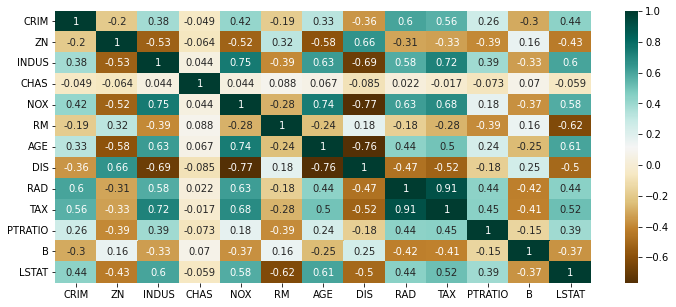

In [9]:
import seaborn as sns

### using pearson correlation

plt.figure(figsize=(12,5))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.BrBG)
plt.show()

In [10]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr 

In [11]:
corr_features = correlation(X_train, 0.7)

In [12]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [13]:
len(set(corr_features))

4

In [14]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4.0,18.4,396.90,4.54


#### let's try with a bigger dataset

In [15]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"gbiamgaurav","key":"25adcca0b19d33a63cbc1bc66924e01d"}'}

In [16]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [17]:
! cp kaggle.json ~/.kaggle/

In [18]:
! kaggle competitions download -c santander-customer-transaction-prediction

 98% 246M/250M [00:02<00:00, 119MB/s]
100% 250M/250M [00:02<00:00, 108MB/s]


In [19]:
! unzip /content/santander-customer-transaction-prediction.zip

Archive:  /content/santander-customer-transaction-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [20]:
df = pd.read_csv('/content/train.csv', nrows=10000)

In [21]:
df.shape

(10000, 202)

In [22]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [23]:
X=df.drop(labels=['target'], axis=1)
y=df['target']

In [24]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

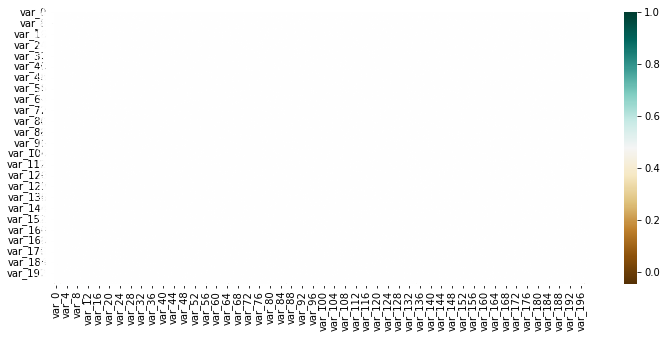

In [25]:
import seaborn as sns
#Using Pearson Correlation

plt.figure(figsize=(12,5))
df_corr = X_train.corr()
sns.heatmap(df_corr, annot=True, cmap=plt.cm.BrBG)
plt.show()

In [26]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

0

In [27]:
corr_features

set()

In [28]:
X_train.drop(corr_features,axis=1)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
7681,train_7681,10.4863,-2.7398,14.2790,5.5327,10.3476,-16.4025,4.4729,19.2719,1.4514,...,4.5727,8.3162,3.2059,4.0840,19.4522,-0.5064,0.7873,10.2313,20.7379,-18.0979
9031,train_9031,10.6967,7.6089,12.5925,6.1039,8.6359,-8.9964,5.6381,14.8921,1.4647,...,-4.0388,9.1590,2.6452,9.7621,17.2660,0.0446,-3.3196,8.0056,10.3225,-1.7882
3691,train_3691,9.6941,-7.5265,10.4699,7.2748,13.6324,-6.6304,3.8343,22.0567,6.0588,...,1.5719,8.0472,2.0257,7.2233,13.9198,1.4742,-2.5926,9.0146,10.0317,11.6792
202,train_202,10.1458,-3.7991,11.4076,7.1423,11.8607,-11.8997,5.9779,20.8832,0.5680,...,-3.7591,5.5010,2.2331,2.9391,22.4858,-1.2093,-0.4785,8.0202,15.1383,-7.2423
5625,train_5625,11.3937,-11.3267,12.8532,5.7098,10.3183,3.2308,5.2837,22.1941,-1.3830,...,-0.3698,7.7765,2.2733,-1.4771,14.4626,-1.4897,-4.1301,7.9210,18.6329,5.9756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,train_9225,12.3681,-4.3199,8.1409,4.1440,9.8034,-5.9605,6.0410,13.0997,3.5184,...,2.0874,10.2360,1.7223,10.0377,17.0149,0.1440,8.5209,8.2301,21.4671,-16.7248
4859,train_4859,13.6207,4.7863,4.5945,9.0850,9.6375,-8.4041,5.3381,16.1414,-2.0034,...,6.1214,15.6289,4.0242,8.6683,19.3841,-1.6808,2.9765,10.3293,13.4478,10.8394
3264,train_3264,9.4846,-3.2322,9.9240,6.2590,9.8045,-10.9758,6.2563,14.1775,-2.1196,...,-2.1754,5.4491,0.1546,-3.3337,18.3612,-0.6648,-6.2034,8.6654,13.9812,0.1364
9845,train_9845,13.8637,-4.3107,10.5369,7.4778,13.5281,3.5168,5.9850,18.3183,-5.1657,...,11.6423,4.7795,1.1894,3.5110,14.8746,1.1861,9.0545,9.5389,18.3340,-12.8267


In [29]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"gbiamgaurav","key":"25adcca0b19d33a63cbc1bc66924e01d"}'}

In [30]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [31]:
! cp kaggle.json ~/.kaggle/

In [32]:
! chmod 600 ~/.kaggle/kaggle.json

In [33]:
! kaggle datasets download -d paresh2047/uci-semcom

uci-semcom.zip: Skipping, found more recently modified local copy (use --force to force download)


In [34]:
! unzip /content/uci-semcom.zip

Archive:  /content/uci-semcom.zip
replace uci-secom.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: uci-secom.csv           


In [35]:
df = pd.read_csv('/content/uci-secom.csv')

In [36]:
df.shape

(1567, 592)

In [37]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [39]:
df.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [40]:
df.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

In [41]:
df.drop(labels=['Time'], axis=1, inplace=True)

In [42]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [43]:
df.isnull().sum()

0             6
1             7
2            14
3            14
4            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 591, dtype: int64

In [44]:
df.dropna()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail


In [45]:
df.isnull().sum()

0             6
1             7
2            14
3            14
4            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 591, dtype: int64

In [46]:
df.dropna(how = 'all')

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [47]:
df.isnull().sum()

0             6
1             7
2            14
3            14
4            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 591, dtype: int64

In [48]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=591)

In [49]:
X=df.drop(labels=['Pass/Fail'], axis=1)
y=df['Pass/Fail']

In [50]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['Pass/Fail'], axis=1),
    df['Pass/Fail'],
    test_size=0.3,
    random_state=0)

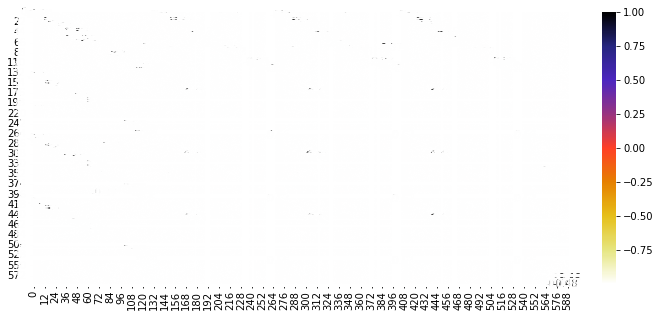

In [51]:
import seaborn as sns
#Using Pearson Correlation

plt.figure(figsize=(12,5))
df_corr = X_train.corr()
sns.heatmap(df_corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [52]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

274

In [53]:
corr_features

{'101',
 '104',
 '105',
 '106',
 '115',
 '123',
 '124',
 '125',
 '127',
 '130',
 '140',
 '142',
 '153',
 '154',
 '155',
 '157',
 '158',
 '163',
 '164',
 '165',
 '169',
 '17',
 '174',
 '18',
 '187',
 '196',
 '197',
 '198',
 '199',
 '202',
 '203',
 '204',
 '205',
 '206',
 '207',
 '209',
 '22',
 '222',
 '224',
 '225',
 '244',
 '245',
 '246',
 '248',
 '249',
 '250',
 '252',
 '254',
 '26',
 '27',
 '270',
 '271',
 '272',
 '273',
 '274',
 '275',
 '277',
 '278',
 '279',
 '280',
 '281',
 '282',
 '283',
 '285',
 '286',
 '287',
 '288',
 '289',
 '290',
 '291',
 '292',
 '293',
 '294',
 '295',
 '296',
 '297',
 '298',
 '299',
 '30',
 '300',
 '301',
 '302',
 '303',
 '304',
 '305',
 '306',
 '307',
 '308',
 '309',
 '310',
 '311',
 '312',
 '316',
 '317',
 '318',
 '319',
 '320',
 '321',
 '323',
 '324',
 '331',
 '332',
 '333',
 '334',
 '335',
 '336',
 '337',
 '338',
 '339',
 '34',
 '340',
 '341',
 '342',
 '343',
 '344',
 '345',
 '346',
 '347',
 '348',
 '349',
 '35',
 '350',
 '351',
 '352',
 '353',
 '354',


In [54]:
X_train.drop(corr_features,axis=1)

,0,1,2,3,4,5,6,8,9,10,...,564,565,570,571,572,578,579,581,582,583
549,3058.60,2568.35,2228.4444,1364.0563,0.8795,100.0,106.2756,1.5886,-0.0044,0.0092,...,7.38,0.0806,529.4909,2.0437,10.66,NaN,NaN,NaN,0.4924,0.0111
638,3048.42,2691.96,2167.9444,861.8041,1.4140,100.0,106.6033,1.4449,-0.0099,0.0037,...,8.19,0.1733,536.6582,2.1390,5.93,NaN,NaN,NaN,0.4989,0.0091
554,3026.87,2436.85,2163.8667,1106.0618,1.6273,100.0,100.8000,1.4862,0.0014,-0.0056,...,NaN,NaN,533.7791,1.6068,9.31,NaN,NaN,NaN,0.5045,0.0212
1069,2994.22,2541.27,2222.0111,1229.4964,0.7647,100.0,105.2711,1.4243,0.0059,-0.0034,...,11.33,0.1926,533.9718,1.9524,5.44,NaN,NaN,NaN,0.4977,0.0157
983,2981.70,2415.79,2201.8666,1185.4396,1.3996,100.0,99.9211,1.4947,-0.0003,0.0077,...,4.98,0.0877,531.3346,2.2421,8.49,NaN,NaN,NaN,0.4995,0.0125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3032.26,2455.05,2145.4555,1017.0577,1.4534,100.0,103.7878,1.3602,-0.0153,0.0032,...,4.98,0.0877,535.3036,2.3086,8.30,NaN,NaN,NaN,0.4973,0.0194
835,3003.72,2537.66,2210.7778,2008.9216,1.1351,100.0,91.1078,1.3940,-0.0073,0.0006,...,6.72,0.2729,529.7436,2.2313,7.19,0.0099,0.0113,114.2878,0.5033,0.0154
1216,3031.85,2439.42,2172.8111,969.3436,1.2736,100.0,102.7367,1.4711,0.0033,-0.0020,...,4.98,0.0877,530.7091,1.8681,5.64,0.0293,0.0045,15.3444,0.5009,0.0167
559,3072.99,2471.62,2126.6555,1015.0770,1.4381,100.0,102.4733,1.5006,-0.0321,-0.0087,...,4.43,0.1641,536.1500,1.9941,8.78,NaN,NaN,NaN,0.5050,0.0174
